### **CDS 503: Machine Learning**  
**Assignment 2: Clustering**

_Nursyaza Nisa Binti Arfarizal_


#### **Dataset Description:**

The dataset contains geographic information for countries and is used for clustering countries into continents based on spatial proximity.

### Dataset Size
- Number of instances: 249 countries  
- Number of attributes: 3

| Attribute       | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| `longitude`     | Geographic coordinate specifying the east–west position of a country on the Earth's surface (in degrees). |
| `latitude`      | Geographic coordinate specifying the north–south position of a country on the Earth's surface (in degrees). |
| `country_name`  | Name of the country corresponding to the geographic coordinates.           |

The `latitude` and `longitude` attributes are numerical features used as input to the K-Means clustering algorithm, while `country_name` is used only for identification and interpretation of the resulting clusters.



In [ ]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [682]:
# Load the dataset
x=pd.read_csv("data/countries_geocodes.csv")

# Display the first few rows of the dataframe
x.head()

,latitude,longitude,country_name
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,-14.270972,-170.132217,American Samoa
4,42.506285,1.521801,Andorra


In [683]:
# View the shape of the dataframe
x.shape

(249, 3)

In [684]:
# View a summary of the dataframe
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      249 non-null    float64
 1   longitude     249 non-null    float64
 2   country_name  249 non-null    object 
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [685]:
# Check for missing values
x.isnull().sum()

latitude        0
longitude       0
country_name    0
dtype: int64

### **Part 1: K-Means Clustering for Continent Identification**

In this lab, the K-Means clustering algorithm is applied to group countries into clusters that represent continents.


#### **Continents**

The following table lists the continents considered in this study. These continents are used as reference categories when interpreting and labeling the clusters produced by the K-Means algorithm based on geographic location.

| Continent       | Description                                        |
|-----------------|----------------------------------------------------|
| Africa          | Countries located primarily within the African region |
| Asia            | Countries located within the Asian region            |
| Europe          | Countries located within Europe                      |
| North America   | Countries located within North America               |
| South America   | Countries located within South America               |
| Oceania         | Countries located in Australia and surrounding islands |
| Antarctica      | Southernmost continent, largely uninhabited and typically excluded from clustering |


In [686]:
# Create a new dataframe with only latitude and longitude
x2 = x[['latitude', 'longitude']]
x2.head()

,latitude,longitude
0,33.939110,67.709953
1,41.153332,20.168331
2,28.033886,1.659626
3,-14.270972,-170.132217
4,42.506285,1.521801


K-Means finds the best centroids by alternating between: 

1) Assigning the data points (laitude and longitude) to clusters based on the current centroids 
2) Choosing centroids (points at center of a cluster) based on the current assigned data points to clusters.

In this experiment, we applied k-means clustering on the dataframe containing only latitude and longitude, x2.

In [687]:
# Calculate SSE for different values of k
k_values = range(1, 11)
sse_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x2)
    sse_values.append(kmeans.inertia_)  # SSE

# Create the DataFrame
sse_df = pd.DataFrame({
    'k': k_values,
    'SSE': sse_values
})

# Calculate reductions in SSE for each increase in k
sse_df['Reduction'] = sse_df['SSE'].diff().abs()
sse_df['Reduction_%'] = (sse_df['Reduction'] / sse_df['SSE'].shift(1)) * 100

# Round to 0 decimal places and remove the .0 by converting to integer
sse_df = sse_df.round(0).astype('Int64')

# Display the SSE DataFrame
sse_df


,k,SSE,Reduction,Reduction_%
0,1,1575290,<NA>,<NA>
1,2,725407,849884,54
2,3,356366,369041,51
3,4,272506,83860,24
4,5,200561,71945,26
5,6,157590,42971,21
6,7,131807,25783,16
7,8,107473,24333,18
8,9,88909,18564,17
9,10,81354,7555,8


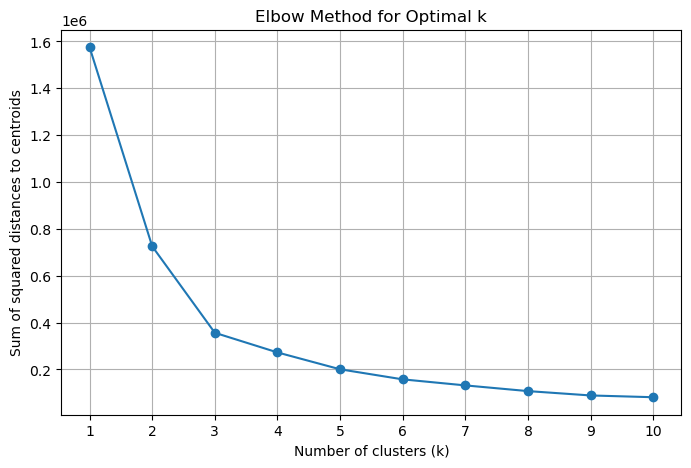

In [701]:
# Plot the SSE vs k (Elbow Method)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(sse_df['k'], sse_df['SSE'], marker='o')
plt.xticks(list(k_values))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances to centroids')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#### **K-Means Clustering Analysis: SSE Reduction Report**

By analyzing the drop in **Sum of Squared Errors (SSE)**, we look for the **"elbow"**, which is the point where the SSE begins to decrease linearly.

##### **1. Analysis of SSE and Reduction Values**
Using the kmeans inertia, we can see the specific changes of adding each additional cluster:

* **Significant Drops:** The most drastic improvements happen between **$k=1$ and $k=3$**.
    * From $k=1 \rightarrow 2$, the SSE drops by **849,884** (a 54% reduction).
    * From $k=2 \rightarrow 3$, the SSE drops by **369,041** (a 51% reduction).
* **The Elbow Point:** There is a noticeable point at **$k=3$** (SSE: 356,366). While $k=4$ and $k=5$ still show decent reductions (approx. 83,860 and 71,945 respectively), the marginal gain in error reduction drops significantly after $k=3$.

##### **2. Recommended Cluster Selections**
Based on the observations, there are two $k$ values that can be considered:

* **Primary Choice: $k=3$** This is the most considered model as it captures most data's variance while keeping the number of clusters low. This ensures the clusters remain distinct and interpretable.

* **Secondary Choice: $k=5$** Another model include value of **$k=5$** that is the last point where the SSE reduction remains relatively high (26%). Beyond this point, the reduction becomes very incremental (dropping to 21% and lower), suggesting that higher values of $k$ may lead to overfitting.

##### **3. Final Selection: k=5**
While $k=3$ is the mathematical "elbow," **$k=5$** is the selected value for this analysis. The value of **$k=5$** is selected by considering **domain relevance**. Since the dataset involves global country metrics, a 5-cluster solution is the best to cluster the countries into continents, aligning with the number of major inhabited continents. This provides a balance between statistical significance (maintaining a 26% reduction rate) and practical interpretability for geographical grouping.

In [689]:
# Covert latitude and longitude to radian
lat_rad = np.radians(x2['latitude'])
lon_rad = np.radians(x2['longitude'])

x2['x'] = np.cos(lat_rad) * np.cos(lon_rad)
x2['y'] = np.cos(lat_rad) * np.sin(lon_rad)
x2['z'] = np.sin(lat_rad)

In [ ]:
# Create a separate variable for the features (X)
x2 = x2[['x', 'y', 'z']]

# Create and fit the KMeans object
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=50, random_state=42)
kmeans.fit(x2)

# Print results for interpretation 
print("Coordinates of cluster centers: ", kmeans.cluster_centers_)
print("Label of each point: ", kmeans.labels_)
print("Number of iterations run: ", kmeans.n_iter_)

Coordinates of cluster centers:  [[ 0.62034231  0.23971256  0.67417275]
 [ 0.32896188 -0.84384317  0.18535836]
 [-0.20162561  0.81825007  0.31146554]
 [ 0.8160927   0.31566794 -0.07702068]
 [-0.85572564  0.04516324 -0.25119858]]
Label of each point:  [2 0 0 4 0 3 1 4 1 1 0 1 4 0 0 1 0 2 1 0 0 1 3 1 2 1 0 3 3 1 2 1 2 0 3 3 2
 3 1 1 1 1 3 3 1 2 2 2 1 3 3 3 4 1 0 1 1 0 0 3 0 3 1 1 1 0 1 3 3 0 3 1 0 4
 0 0 1 4 3 3 3 1 0 3 0 0 0 1 1 2 1 0 3 3 1 1 3 1 2 0 0 2 2 0 0 0 0 0 0 1 2
 0 0 0 3 4 0 2 2 0 0 3 3 0 0 0 0 2 0 3 3 2 2 3 0 4 1 0 3 3 1 4 0 0 2 0 1 0
 3 2 3 4 2 0 4 4 1 3 3 4 4 2 2 0 0 2 2 0 1 4 1 1 2 4 0 0 1 0 0 2 3 3 4 0 0
 3 0 3 3 2 1 0 0 4 3 3 3 2 3 0 2 1 3 1 1 1 1 1 3 1 0 3 0 0 0 3 2 2 3 2 2 3
 4 4 1 0 0 0 1 4 4 1 0 1 3 0 0 1 0 4 0 1 2 4 0 3 3 3 0]
Number of iterations run:  9


In [ ]:
# Coordinates of the centroids (Center of each cluster)
centroids = kmeans.cluster_centers_

# Sum of squared differences (also known as Inertia or SSE)
sse = kmeans.inertia_

# Number of iterations it took for the model to converge
iterations = kmeans.n_iter_

print("--- Final Model Report ---")
print(f"Number of Iterations: {iterations}")
print(f"Total Sum of Squared Errors (SSE): {sse:.4f}")
print("\nCentroid Coordinates (x, y, z):")
for i, center in enumerate(centroids):
    print(f"Cluster {i}: {center}")

--- Final Model Report ---
Number of Iterations: 9
Total Sum of Squared Errors (SSE): 40.5558

Centroid Coordinates (x, y, z):
Cluster 0: [0.62034231 0.23971256 0.67417275]
Cluster 1: [ 0.32896188 -0.84384317  0.18535836]
Cluster 2: [-0.20162561  0.81825007  0.31146554]
Cluster 3: [ 0.8160927   0.31566794 -0.07702068]
Cluster 4: [-0.85572564  0.04516324 -0.25119858]


From the label of each point, note that the clusters are labeled cluster 0, cluster 1 and cluster 2, cluster3 and cluster4. 

Since there are only 2 dimensions (2 attributes), we can map the data points in a 2-dimensional scatter plot. The first 2 parameters in scatter() indicates the data position. The first parameter indicates all the area values in cluster 0. The secondparameter indicates all the perimeter values in cluster 0

In [691]:
# Save new clusters for plot
y_kmeans = kmeans.fit_predict(x2)
y_kmeans

array([2, 0, 0, 4, 0, 3, 1, 4, 1, 1, 0, 1, 4, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       3, 1, 2, 1, 0, 3, 3, 1, 2, 1, 2, 0, 3, 3, 2, 3, 1, 1, 1, 1, 3, 3,
       1, 2, 2, 2, 1, 3, 3, 3, 4, 1, 0, 1, 1, 0, 0, 3, 0, 3, 1, 1, 1, 0,
       1, 3, 3, 0, 3, 1, 0, 4, 0, 0, 1, 4, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1,
       1, 2, 1, 0, 3, 3, 1, 1, 3, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 3, 4, 0, 2, 2, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 3, 3, 2,
       2, 3, 0, 4, 1, 0, 3, 3, 1, 4, 0, 0, 2, 0, 1, 0, 3, 2, 3, 4, 2, 0,
       4, 4, 1, 3, 3, 4, 4, 2, 2, 0, 0, 2, 2, 0, 1, 4, 1, 1, 2, 4, 0, 0,
       1, 0, 0, 2, 3, 3, 4, 0, 0, 3, 0, 3, 3, 2, 1, 0, 0, 4, 3, 3, 3, 2,
       3, 0, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 0, 3, 0, 0, 0, 3, 2, 2, 3, 2,
       2, 3, 4, 4, 1, 0, 0, 0, 1, 4, 4, 1, 0, 1, 3, 0, 0, 1, 0, 4, 0, 1,
       2, 4, 0, 3, 3, 3, 0])

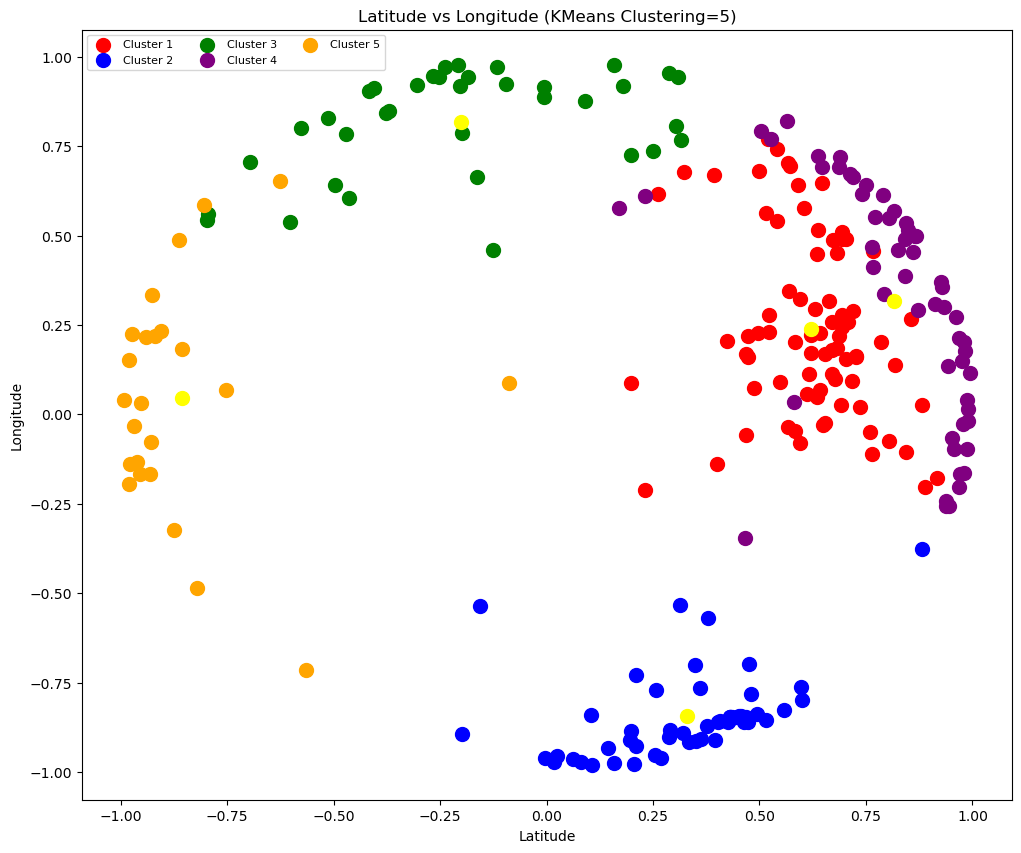

In [702]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Set plot size
plt.figure(figsize = (12,10))
# Plot the 3 clusters# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_kmeans == 0, 0], x2.iloc[y_kmeans == 0, 1], s = 100,                      
                       c = 'red', label = 'Cluster 1')
# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_kmeans == 1, 0], x2.iloc[y_kmeans == 1, 1], s = 100,                        
                       c= 'blue', label = 'Cluster 2')
# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_kmeans == 2, 0], x2.iloc[y_kmeans == 2, 1], s = 100,                       
                       c = 'green', label = 'Cluster 3')
#Visualing cluster 3
cluster3 = plt.scatter(x2.iloc[y_kmeans == 3, 0], x2.iloc[y_kmeans == 3, 1], s = 100,                       
                      c = 'purple', label = 'Cluster 4')
# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_kmeans == 4, 0], x2.iloc[y_kmeans == 4, 1], s = 100,                      
                      c = 'orange', label = 'Cluster 5')

# Plot the centroids# We are going to use the attribute that returns the coordinates of the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100,           
            c = 'yellow', label = 'Centroids')
# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4),           ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'),           
           scatterpoints = 1,           
           loc = 'upper left',           
           ncol = 3,           
           fontsize = 8)
# Show plot title
plt.title('Latitude vs Longitude (KMeans Clustering=5)')
# Label x-axis
plt.xlabel('Latitude')
# Label y-axis
plt.ylabel('Longitude')
# Show plot
plt.show()

In [693]:
x2['final_cluster'] = y_kmeans
x2.head()   

,x,y,z,final_cluster
0,0.314675,0.767638,0.558312,2
1,0.706783,0.259602,0.658076,0
2,0.882300,0.025564,0.469994,0
3,-0.954803,-0.166087,-0.246508,4
4,0.736943,0.019578,0.675671,0


In [ ]:
# Assuming 'df' is your original dataframe with 'Country' names
x['final_cluster'] = kmeans.labels_

# View the result to ensure countries are now matched with clusters
x[['latitude', 'longitude', 'country_name', 'final_cluster']].head()

# Save the merged dataframe to a CSV file
x.to_csv('data/kmeans_countries_clustered.csv', index=False)

print("File saved successfully as 'kmeans_countries_clustered.csv'!")

File saved successfully as 'kmeans_countries_clustered.csv'!


#### Check Continents Correctly Classified

In [695]:
#!pip install pycountry-convert

In [ ]:
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        # Merge North and South America continent together
        if continent_name in ["North America", "South America"]:
            return "Americas"
        return continent_name
    except:
        return None  # Return None for cleaning

# Apply and clean the data
x['actual_continent'] = x['country_name'].apply(get_continent)
clean_df = x.dropna(subset=['actual_continent']).copy() # Remove "Unknowns" from the testing

# Save the merged dataframe to a CSV file
x.to_csv('data/true_continent.csv', index=False)

print("File saved successfully as 'true_continents.csv'!")

File saved successfully as 'true_continents.csv'!


In [ ]:
# Define the manual mapping for the 32 missing countries
manual_map = {
    'Antarctica': 'Antarctica', 'Antigua & Barbuda': 'Americas', 'Bosnia': 'Europe',
    'Caribbean Netherlands': 'Americas', 'Congo - Brazzaville': 'Africa',
    'Congo - Kinshasa': 'Africa', 'Curacao': 'Americas', 'Cote dIvoire': 'Africa',
    'French Southern Territories': 'Antarctica', 'Heard & McDonald Islands': 'Antarctica',
    'Pitcairn Islands': 'Oceania', 'Reunion': 'Africa', 'Sint Maarten': 'Americas',
    'South Georgia & South Sandwich Islands': 'Antarctica', 'St. Barthelemy': 'Americas',
    'St. Helena': 'Africa', 'St. Kitts & Nevis': 'Americas', 'St. Pierre & Miquelon': 'Americas',
    'St. Vincent & Grenadines': 'Americas', 'Svalbard & Jan Mayen': 'Europe',
    'Sao Tome & Principe': 'Africa', 'Timor-Leste': 'Asia', 'Trinidad & Tobago': 'Americas',
    'Turks & Caicos Islands': 'Americas', 'U.S. Outlying Islands': 'Oceania',
    'U.S. Virgin Islands': 'Americas', 'UK': 'Europe', 'US': 'Americas',
    'Vatican City': 'Europe', 'Wallis & Futuna': 'Oceania', 'Western Sahara': 'Africa',
    'Aland Islands': 'Europe'
}

In [ ]:
# Fill the missing actual_continent values using the map
# (This ensures actual_continent has no more 'Other/Unknown' or 'None' values)
x['actual_continent'] = x['actual_continent'].replace("Other/Unknown", np.nan)
x['actual_continent'] = x['actual_continent'].fillna(x['country_name'].map(manual_map))

# Use the full dataframe (no rows dropped)
# We rename it to 'final_df' to be clear
final_df = x.copy()

# Map Clusters to Continent Names
cluster_map = final_df.groupby('final_cluster')['actual_continent'].agg(lambda x: x.mode()[0]).to_dict()
final_df['predicted_continent'] = final_df['final_cluster'].map(cluster_map)

# Final Accuracy Check
correct_count = (final_df['actual_continent'] == final_df['predicted_continent']).sum()
total_count = len(final_df) # This will now be 249
accuracy = (correct_count / total_count) * 100

print(f"Standardized Mapping: {cluster_map}")
print(f"Correctly Clustered: {correct_count} out of {total_count}")
print(f"Final Accuracy: {accuracy:.2f}%")

Standardized Mapping: {0: 'Europe', 1: 'Americas', 2: 'Asia', 3: 'Africa', 4: 'Oceania'}
Correctly Clustered: 209 out of 249
Final Accuracy: 83.94%


In [ ]:
# Create a dictionary that finds the most frequent actual continent in each cluster
cluster_map = x.groupby('final_cluster')['actual_continent'].agg(lambda x: x.mode()[0]).to_dict()

# Map those names to a NEW column (this prevents the KeyError)
x['predicted_continent'] = x['final_cluster'].map(cluster_map)

# Filter rows where the actual continent doesn't match the prediction
mismatches = x[x['actual_continent'] != x['predicted_continent']]

# Display the countries causing the accuracy to drop
mismatches[['country_name', 'actual_continent', 'predicted_continent', 'final_cluster']]

,country_name,actual_continent,predicted_continent,final_cluster
2,Algeria,Africa,Europe,0
7,Antarctica,Antarctica,Oceania,4
10,Armenia,Asia,Europe,0
14,Azerbaijan,Asia,Europe,0
16,Bahrain,Asia,Europe,0
28,Bouvet Island,Antarctica,Africa,3
39,Cape Verde,Africa,Americas,1
57,Cyprus,Asia,Europe,0
65,Egypt,Africa,Europe,0
78,French Southern Territories,Antarctica,Africa,3


### **Part 2: Hierarchical Clustering for Continent Identification**

In this lab, the Hierarchical clustering algorithm is applied to group countries into hierarchy that represent continents.